In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime


mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

print()
print("train.num = ", mnist.train.num_examples)
print("test.num = ", mnist.test.num_examples)
print("validation_num = ", mnist.validation.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

train.num =  55000
test.num =  10000
validation_num =  5000


In [3]:
learning_rate = 1e-3
epochs = 30
batch_size = 100

In [4]:
X = tf.placeholder(tf.float32, [None, 784])

T = tf.placeholder(tf.float32, [None, 10])

A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])

In [5]:
W2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32]))

C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

Z2 = tf.nn.relu(C2 + b2)

A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
A2_flat = P2_flat = tf.reshape(A2, [-1, 14*14*32])

In [7]:
W3 = tf.Variable(tf.random_normal([14*14*32, 1]))
b3 = tf.Variable(tf.random_normal([1]))

Z3 = tf.matmul(A2_flat, W3) + b3
A3 = tf.sigmoid(Z3)

In [8]:
W4 = tf.Variable(tf.random_normal([14*14*32, 10], stddev=0.01))
b4 = tf.Variable(tf.random_normal([10]))

Z4 = logits = tf.matmul(A2_flat, W4) + b4

y = A4 = tf.nn.softmax(Z4)

In [9]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z4, labels=T))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [10]:
predicted_val = tf.equal(tf.argmax(A4, 1), tf.argmax(T, 1))

accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

predicted_list = tf.argmax(A4, 1)
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

In [11]:
index_label_prediction_list = []

with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):

    total_batch = int(mnist.train.num_examples / batch_size)

    for step in range(total_batch):

      batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)

      loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})

      if step % 100 == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

  end_time = datetime.now()

  print("\nelapsed time = ", end_time - start_time)

  test_x_data = mnist.test.images
  test_t_data = mnist.test.labels

  accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})

  print("\nAccuracy = ", accuracy_val)
  print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
  print("index_label.shape = ", index_label.shape)
    
  index_label_list = list(index_label)
  print("length of index_label_list = ", len(index_label_list))
  print("false label count = ", index_label_list.count([0]))
        
  temp_list = [] 
    
  for index in range(len(index_label)):
        
      if index_label[index] == 0:
            
          temp_list.append(index)
          temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
          temp_list.append(predicted_list_val[index])
            
          index_label_prediction_list.append(temp_list)
            
          temp_list = []
            
  print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  2.6122034
epochs =  0 , step =  100 , loss_val =  0.94411933
epochs =  0 , step =  200 , loss_val =  0.4539352
epochs =  0 , step =  300 , loss_val =  0.28207034
epochs =  0 , step =  400 , loss_val =  0.25965267
epochs =  0 , step =  500 , loss_val =  0.14852092
epochs =  1 , step =  0 , loss_val =  0.22914581
epochs =  1 , step =  100 , loss_val =  0.1860624
epochs =  1 , step =  200 , loss_val =  0.21613544
epochs =  1 , step =  300 , loss_val =  0.19621636
epochs =  1 , step =  400 , loss_val =  0.16348723
epochs =  1 , step =  500 , loss_val =  0.059776284
epochs =  2 , step =  0 , loss_val =  0.15407707
epochs =  2 , step =  100 , loss_val =  0.06826458
epochs =  2 , step =  200 , loss_val =  0.10910277
epochs =  2 , step =  300 , loss_val =  0.1456983
epochs =  2 , step =  400 , loss_val =  0.04767835
epochs =  2 , step =  500 , loss_val =  0.1483444
epochs =  3 , step =  0 , loss_val =  0.112819046
epochs =  3 , step =  100 , loss_val =  0.

In [13]:
print(index_label_prediction_list)

[[247, 4, 6], [259, 6, 0], [340, 5, 3], [445, 6, 0], [502, 5, 9], [659, 2, 1], [684, 7, 2], [740, 4, 9], [947, 8, 9], [1014, 6, 5], [1039, 7, 3], [1112, 4, 6], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 5], [1260, 7, 1], [1319, 8, 0], [1326, 7, 2], [1393, 5, 3], [1500, 7, 1], [1522, 7, 9], [1527, 1, 5], [1530, 8, 7], [1549, 4, 6], [1621, 0, 6], [1681, 3, 7], [1709, 9, 3], [1717, 8, 0], [1737, 5, 2], [1754, 7, 2], [1790, 2, 7], [1828, 3, 7], [1878, 8, 3], [1901, 9, 4], [2035, 5, 3], [2052, 8, 4], [2053, 4, 9], [2070, 7, 9], [2093, 8, 2], [2098, 2, 0], [2107, 8, 9], [2118, 6, 0], [2129, 9, 2], [2130, 4, 9], [2135, 6, 1], [2189, 9, 1], [2195, 7, 2], [2266, 1, 2], [2293, 9, 2], [2326, 0, 8], [2329, 0, 2], [2406, 9, 4], [2414, 9, 4], [2447, 4, 9], [2578, 7, 2], [2597, 5, 3], [2654, 6, 1], [2713, 0, 8], [2760, 9, 4], [2771, 4, 9], [2896, 8, 0], [2939, 9, 5], [2953, 3, 5], [3030, 6, 0], [3060, 9, 2], [3109, 7, 1], [3189, 7, 2], [3289, 8, 9], [3422, 6, 0], [3503, 9, 1], [3520, 6, 4], 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

len of index_label_prediction_list =>  146 , false_data_index =>  85


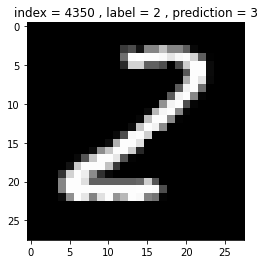

In [15]:
false_data_index = np.random.randint(len(index_label_prediction_list))

print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = test_x_data[mnist_index].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()